In [1]:
import numpy as np
import os
import cv2

from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

/Users/tyronemariano/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
model = load_model(os.path.expanduser('~/Desktop/melanoma_cnn.h5'))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,055,908 (65.06 MB)

 Trainable params: 17,053,730 (65.05 MB)

 Non-trainable params: 2,176 (8.50 KB)

 Optimizer params: 2 (12.00 B)

In [3]:
SIZE = 128

image = cv2.imread('test_data/malignant2.jpg')
image = Image.fromarray(image, 'RGB')
image = image.resize((SIZE, SIZE))
image = np.array(image)/255

In [4]:
image

array([[[0.34117647, 0.39607843, 0.50980392],
        [0.3254902 , 0.38039216, 0.49411765],
        [0.34901961, 0.40392157, 0.51764706],
        ...,
        [0.57254902, 0.61176471, 0.6745098 ],
        [0.58823529, 0.62352941, 0.67843137],
        [0.5254902 , 0.56078431, 0.61568627]],

       [[0.33333333, 0.38823529, 0.50196078],
        [0.32156863, 0.37647059, 0.49019608],
        [0.37647059, 0.43137255, 0.54509804],
        ...,
        [0.58039216, 0.61176471, 0.68235294],
        [0.58431373, 0.61960784, 0.6745098 ],
        [0.56078431, 0.59607843, 0.65098039]],

       [[0.31764706, 0.37254902, 0.48627451],
        [0.32941176, 0.38431373, 0.49803922],
        [0.38823529, 0.44313725, 0.55686275],
        ...,
        [0.54117647, 0.58431373, 0.65490196],
        [0.6       , 0.63529412, 0.69803922],
        [0.58823529, 0.62352941, 0.67843137]],

       ...,

       [[0.49803922, 0.52941176, 0.61568627],
        [0.47058824, 0.50196078, 0.58431373],
        [0.49803922, 0

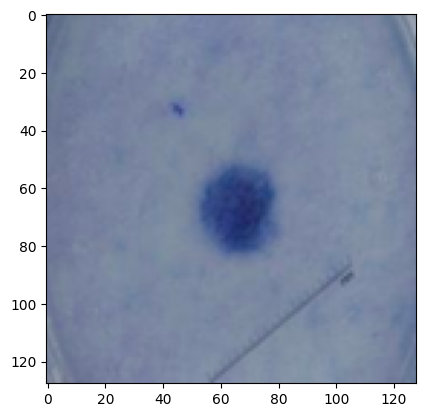

In [5]:
plt.imshow(image)

In [6]:
pred = model.predict(np.expand_dims(image, 0))
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[0.19916604 0.8055733 ]]
